In [ ]:
!pip install --upgrade tensorflow transformers

In [ ]:
!pip install textaugment

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd


df = pd.read_csv("/content/IMDBDataset.csv")


print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


##SVM and Naive Bayes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


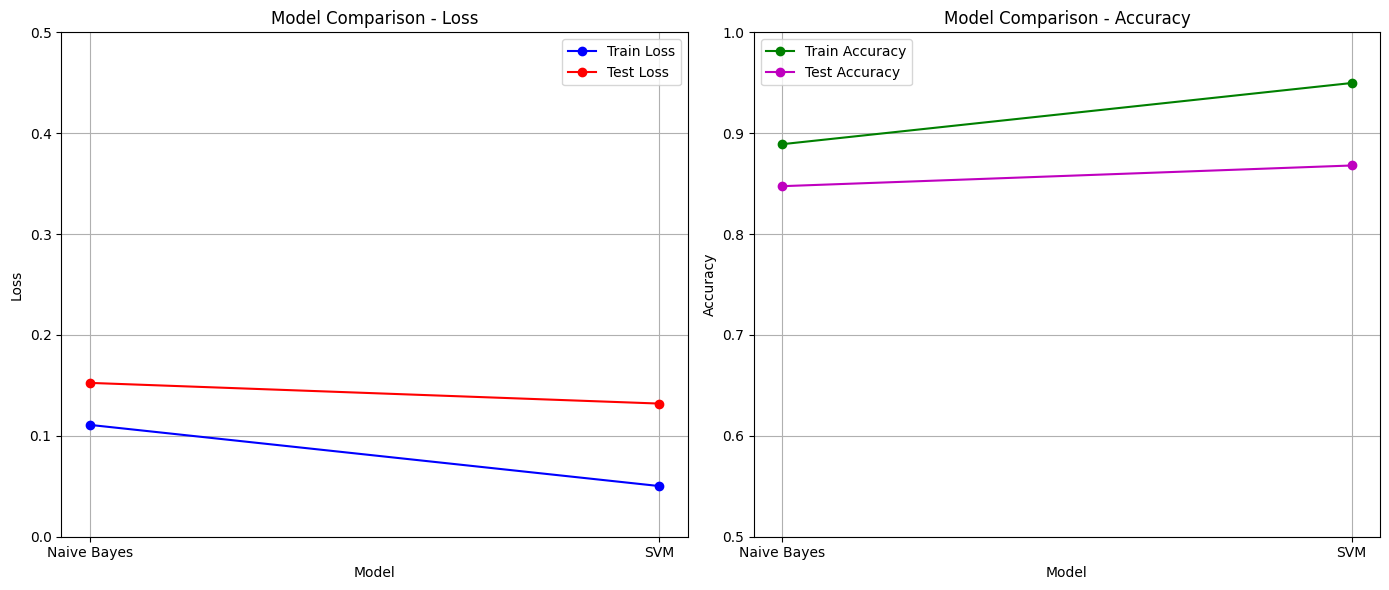


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       999
           1       0.85      0.85      0.85      1001

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       999
           1       0.85      0.89      0.87      1001

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')


def clean_html(text):
    return re.sub(r'<[^>]+>', '', text)

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


def load_data():
    df = pd.read_csv('/content/IMDBDataset.csv')
    df['review'] = df['review'].apply(clean_html)
    df['review'] = df['review'].apply(remove_special_chars)
    df = df.rename(columns={'review': 'Text', 'sentiment': 'Sentiment'})
    df = df.dropna().reset_index(drop=True)

    if len(df) > 10000:
        df = df.sample(n=10000, random_state=42).reset_index(drop=True)
    return df


def text_augmentation(text):
    words = text.split()
    if len(words) > 3:
        for i in range(1, len(words)-1):
            if random.random() < 0.3:
                words[i], words[i+1] = words[i+1], words[i]

    if random.random() < 0.1:
        text += ' ' + random.choice(['great', 'bad', 'excellent', 'terrible'])

    return ' '.join(words)

def process_data(df):
    augmented_indices = random.sample(range(len(df)), int(0.7*len(df)))
    df.loc[augmented_indices, 'Text'] = df.loc[augmented_indices, 'Text'].apply(text_augmentation)

    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

    return df


def evaluate_and_plot(models, X_train, y_train, X_test, y_test):
    results = []

    for name, model in models:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        results.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Train Loss': 1 - train_acc,
            'Test Loss': 1 - test_acc
        })

    results_df = pd.DataFrame(results)

    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    plt.plot(results_df['Model'], results_df['Train Loss'], 'bo-', label='Train Loss')
    plt.plot(results_df['Model'], results_df['Test Loss'], 'ro-', label='Test Loss')
    plt.title('Model Comparison - Loss')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 0.5)


    plt.subplot(1, 2, 2)
    plt.plot(results_df['Model'], results_df['Train Accuracy'], 'go-', label='Train Accuracy')
    plt.plot(results_df['Model'], results_df['Test Accuracy'], 'mo-', label='Test Accuracy')
    plt.title('Model Comparison - Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.5, 1.0)

    plt.tight_layout()
    plt.show()

    return results_df

def main():

    df = load_data()
    df = process_data(df)


    X_train, X_test, y_train, y_test = train_test_split(
        df['Text'], df['Sentiment'], test_size=0.2, random_state=42
    )


    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)


    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)


    models = [
        ('Naive Bayes', MultinomialNB()),
        ('SVM', SVC(kernel='linear', probability=True))
    ]


    results = evaluate_and_plot(models, X_train_vec, y_train_enc, X_test_vec, y_test_enc)


    for name, model in models:
        print(f"\n{name} Classification Report:")
        y_pred = model.predict(X_test_vec)
        print(classification_report(y_test_enc, y_pred))

if __name__ == "__main__":
    main()

##CNN

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 125/125 [01:20<00:00,  1.56it/s]


Epoch 1, Train Loss: 0.6693, Validation Loss: 0.6020


100%|██████████| 125/125 [01:11<00:00,  1.74it/s]


Epoch 2, Train Loss: 0.4176, Validation Loss: 0.5715


100%|██████████| 125/125 [01:09<00:00,  1.79it/s]


Epoch 3, Train Loss: 0.1753, Validation Loss: 0.5516


100%|██████████| 125/125 [01:09<00:00,  1.80it/s]


Epoch 4, Train Loss: 0.0467, Validation Loss: 0.5439


100%|██████████| 125/125 [01:09<00:00,  1.80it/s]


Epoch 5, Train Loss: 0.0171, Validation Loss: 0.5508


100%|██████████| 125/125 [01:10<00:00,  1.77it/s]


Epoch 6, Train Loss: 0.0094, Validation Loss: 0.5764


100%|██████████| 125/125 [01:09<00:00,  1.80it/s]


Epoch 7, Train Loss: 0.0060, Validation Loss: 0.5980


100%|██████████| 125/125 [01:09<00:00,  1.81it/s]


Epoch 8, Train Loss: 0.0042, Validation Loss: 0.5826


100%|██████████| 125/125 [01:10<00:00,  1.78it/s]


Epoch 9, Train Loss: 0.0031, Validation Loss: 0.5912


100%|██████████| 125/125 [01:08<00:00,  1.81it/s]


Epoch 10, Train Loss: 0.0024, Validation Loss: 0.5977


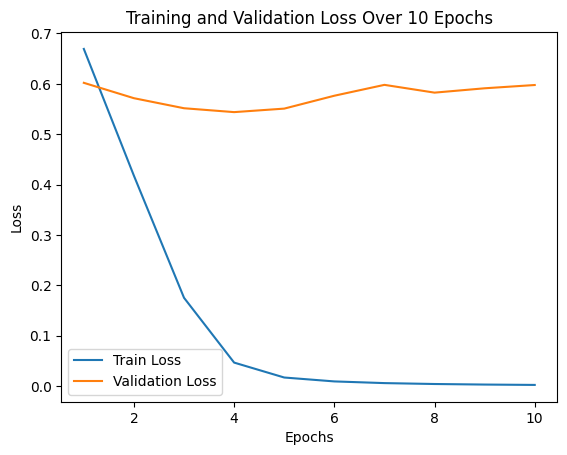


Final Results:
Accuracy: 0.7075
F1 Score: 0.6609
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       999
           1       0.79      0.57      0.66      1001

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.70      2000
weighted avg       0.72      0.71      0.70      2000



In [8]:
import random
import re
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


def aggressive_augment(text, shuffle_ratio=0.6, delete_ratio=0.4, insert_ratio=0.4):
    words = text.split()
    augmented_words = []
    for word in words:
        if len(word) > 2 and random.random() < shuffle_ratio:
            middle = list(word[1:-1])
            random.shuffle(middle)
            word = word[0] + ''.join(middle) + word[-1]
        if random.random() < delete_ratio:
            continue
        augmented_words.append(word)
        if random.random() < insert_ratio:
            augmented_words.append(random.choice(words))
    random.shuffle(augmented_words)
    return ' '.join(augmented_words)

def add_random_noise(text, noise_ratio=0.1):
    words = text.split()
    for i in range(len(words)):
        if random.random() < noise_ratio:
            words[i] = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=random.randint(3,8)))
    return ' '.join(words)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])


def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Text'] = df['review'].apply(lambda x: re.sub('<.*?>', '', x))
    df['Sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
    return df[['Text', 'Sentiment']]


def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return [word for word in tokens if word.isalnum()]


def build_vocab(texts):
    word_to_index = {'<PAD>': 0}
    index = 1
    for text in texts:
        for word in preprocess(text):
            if word not in word_to_index:
                word_to_index[word] = index
                index += 1
    return word_to_index

def text_to_sequence(text, word_to_index, max_len):
    sequence = [word_to_index.get(word, 0) for word in preprocess(text)]
    return sequence[:max_len] + [0]*(max_len - len(sequence)) if len(sequence) < max_len else sequence[:max_len]


class SentimentCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(SentimentCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1 = nn.Conv1d(embed_dim, 128, 5, padding=2)
        self.pool = nn.MaxPool1d(5)
        self.global_pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.embedding(x).permute(0, 2, 1)
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = self.global_pool(x).squeeze(2)
        x = self.fc(x)
        return x


def main():

    df = load_data('/content/IMDBDataset.csv').sample(10000, random_state=42)


    tqdm.pandas()


    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_df['Text'] = train_df['Text'].progress_apply(lambda x: remove_stopwords(
        add_random_noise(
            aggressive_augment(x)
        )
    ))


    word_to_index = build_vocab(train_df['Text'])


    max_len = 200
    X_train = torch.tensor([text_to_sequence(text, word_to_index, max_len) for text in train_df['Text']], dtype=torch.long)
    X_test = torch.tensor([text_to_sequence(text, word_to_index, max_len) for text in test_df['Text']], dtype=torch.long)
    y_train = torch.tensor(train_df['Sentiment'].values, dtype=torch.long)
    y_test = torch.tensor(test_df['Sentiment'].values, dtype=torch.long)


    vocab_size = len(word_to_index) + 1
    model = SentimentCNN(vocab_size, 128, 2)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)


    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

    train_loss_history = []
    val_loss_history = []
    for epoch in range(10):
        model.train()
        total_train_loss = 0
        for inputs, labels in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_loss_history.append(avg_train_loss)


        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_loss_history.append(avg_val_loss)

        print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")


    plt.plot(range(1, 11), train_loss_history, label='Train Loss')
    plt.plot(range(1, 11), val_loss_history, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over 10 Epochs')
    plt.legend()
    plt.show()


    model.eval()
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64)
    y_pred, y_true = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            y_pred.extend(torch.argmax(outputs, 1).tolist())
            y_true.extend(labels.tolist())

    print("\nFinal Results:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

if __name__ == "__main__":
    main()


##BERT

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Train Loss: 0.594 | Test Loss: 0.396
Epoch 2 | Train Loss: 0.455 | Test Loss: 0.385
Epoch 3 | Train Loss: 0.298 | Test Loss: 0.374
Epoch 4 | Train Loss: 0.146 | Test Loss: 0.455
Epoch 5 | Train Loss: 0.078 | Test Loss: 0.467
Epoch 6 | Train Loss: 0.053 | Test Loss: 0.464
Epoch 7 | Train Loss: 0.028 | Test Loss: 0.708
Epoch 8 | Train Loss: 0.027 | Test Loss: 0.702
Epoch 9 | Train Loss: 0.024 | Test Loss: 0.682
Epoch 10 | Train Loss: 0.016 | Test Loss: 0.835

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.69      0.79       999
    positive       0.75      0.94      0.83      1001

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000



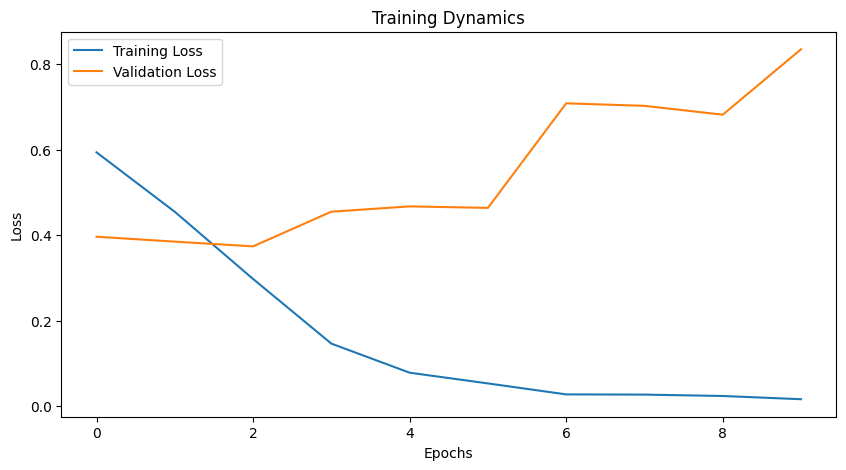

In [19]:
import pandas as pd
import numpy as np
import torch
import random
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from nltk.corpus import stopwords

nltk.download('stopwords')


def aggressive_augment(text, shuffle_ratio=0.8, delete_ratio=0.6, insert_ratio=0.6):
    words = text.split()
    augmented_words = []
    for word in words:
        if len(word) > 2 and random.random() < shuffle_ratio:
            middle = list(word[1:-1])
            random.shuffle(middle)
            word = word[0] + ''.join(middle) + word[-1]
        if random.random() < delete_ratio:
            continue
        augmented_words.append(word)
        if random.random() < insert_ratio:
            augmented_words.append(random.choice(words))
    random.shuffle(augmented_words)
    return ' '.join(augmented_words)

def add_random_noise(text, noise_ratio=0.2):
    words = text.split()
    for i in range(len(words)):
        if random.random() < noise_ratio:
            words[i] = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=random.randint(3, 8)))
    return ' '.join(words)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)


df = pd.read_csv("/content/IMDBDataset.csv")
df = df.rename(columns={'review': 'Text', 'sentiment': 'Sentiment'})
df = df.dropna()


if len(df) > 10000:
    df = df.sample(n=10000, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)



augmented_indices = random.sample(range(len(X_train)), int(0.75 * len(X_train)))
X_train = X_train.copy()
for idx in augmented_indices:
    X_train.iloc[idx] = aggressive_augment(X_train.iloc[idx])


X_train = X_train.apply(add_random_noise)


X_train = X_train.apply(remove_stopwords)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


class BERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels[index]

        encoded = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }


bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))


train_dataset = BERTDataset(X_train, y_train_encoded, bert_tokenizer, max_length=128)
test_dataset = BERTDataset(X_test, y_test_encoded, bert_tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
optimizer = torch.optim.Adam(bert_model.parameters(), lr=2e-5)


train_losses = []
test_losses = []
for epoch in range(10):
    bert_model.train()
    total_train_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    bert_model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
            total_test_loss += outputs.loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.3f} | Test Loss: {avg_test_loss:.3f}")


def evaluate(model, dataloader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

y_pred, y_true = evaluate(bert_model, test_loader)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training Dynamics')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##RNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Epoch 1/10
Train Loss: 0.6098 | Val Loss: 0.5285
Train Acc: 0.6519 | Val Acc: 0.7390
Val F1-Score: 0.7381

Epoch 2/10
Train Loss: 0.4699 | Val Loss: 0.4951
Train Acc: 0.7819 | Val Acc: 0.7565
Val F1-Score: 0.7541

Epoch 3/10
Train Loss: 0.4090 | Val Loss: 0.4615
Train Acc: 0.8174 | Val Acc: 0.7826
Val F1-Score: 0.7825

Epoch 4/10
Train Loss: 0.3659 | Val Loss: 0.4858
Train Acc: 0.8411 | Val Acc: 0.7806
Val F1-Score: 0.7795

Epoch 5/10
Train Loss: 0.3255 | Val Loss: 0.4851
Train Acc: 0.8609 | Val Acc: 0.7874
Val F1-Score: 0.7873

Epoch 6/10
Train Loss: 0.2840 | Val Loss: 0.4842
Train Acc: 0.8815 | Val Acc: 0.7821
Val F1-Score: 0.7820

Epoch 7/10
Train Loss: 0.2460 | Val Loss: 0.5435
Train Acc: 0.9009 | Val Acc: 0.7802
Val F1-Score: 0.7796

Epoch 8/10
Train Loss: 0.2012 | Val Loss: 0.6410
Train Acc: 0.9223 | Val Acc: 0.7688
Val F1-Score: 0.7683

Epoch 9/10
Train Loss: 0.1627 | Val Loss: 0.6819
Train Acc: 0.9384 | Val Acc: 0.7745
Val F1-Score: 0.7745
Early stopping at epoch 10


<ipython-input-18-c83a9b32ed2a>:222: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))



Final Test Results:
Accuracy: 0.7874
Precision: 0.7877
Recall: 0.7874
F1-Score: 0.7873

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.77      0.78      4961
    positive       0.78      0.81      0.79      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



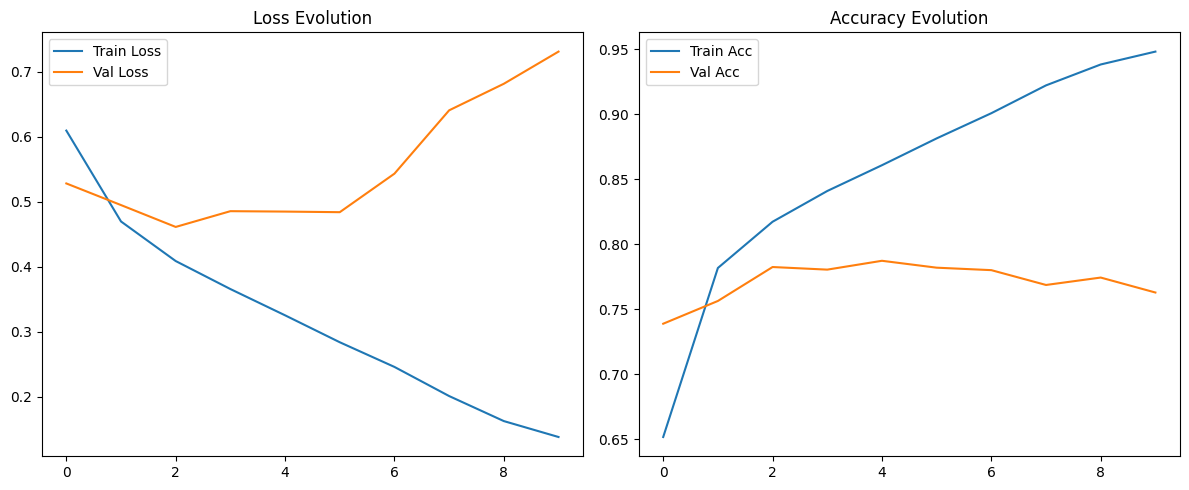

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')


def load_and_preprocess_data():
    file_path = "/content/IMDBDataset.csv"
    df = pd.read_csv(file_path)
    df = df.rename(columns={'review': 'Text', 'sentiment': 'Sentiment'})
    df = df.dropna()
    return df


def aggressive_augment(text, shuffle_ratio=0.8, delete_ratio=0.6, insert_ratio=0.6):
    words = text.split()
    augmented_words = []
    for word in words:
        if len(word) > 2 and random.random() < shuffle_ratio:
            middle = list(word[1:-1])
            random.shuffle(middle)
            word = word[0] + ''.join(middle) + word[-1]
        if random.random() < delete_ratio:
            continue
        augmented_words.append(word)
        if random.random() < insert_ratio:
            augmented_words.append(random.choice(words))
    random.shuffle(augmented_words)
    return ' '.join(augmented_words)

def add_random_noise(text, noise_ratio=0.2):
    words = text.split()
    for i in range(len(words)):
        if random.random() < noise_ratio:
            words[i] = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=random.randint(3, 8)))
    return ' '.join(words)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)


def prepare_data(df):

    augmented_indices = random.sample(range(len(df)), int(0.75 * len(df)))
    for i in augmented_indices:
        df.at[i, 'Text'] = aggressive_augment(df.at[i, 'Text'])


    for i in range(len(df)):
        df.at[i, 'Text'] = add_random_noise(df.at[i, 'Text'], noise_ratio=0.2)


    df['Text'] = df['Text'].apply(remove_stopwords)


    X_train, X_test, y_train, y_test = train_test_split(
        df['Text'], df['Sentiment'], test_size=0.2, random_state=42
    )


    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    return X_train, X_test, y_train_encoded, y_test_encoded, label_encoder


class TextRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(TextRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        out = self.dropout(lstm_out[:, -1, :])
        out = self.fc(out)
        return out


def train_model(model, train_loader, test_loader, criterion, optimizer, device, epochs=10, patience=5):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    best_f1 = 0.0
    trigger_times = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = total_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        model.eval()
        val_loss = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs.data, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_loss = val_loss / len(test_loader)
        val_acc = accuracy_score(all_labels, all_preds)
        val_f1 = f1_score(all_labels, all_preds, average='weighted')

        val_losses.append(val_loss)
        val_accs.append(val_acc)

        if val_f1 > best_f1:
            best_f1 = val_f1
            trigger_times = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        print(f"\nEpoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        print(f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
        print(f"Val F1-Score: {val_f1:.4f}")

    return train_losses, val_losses, train_accs, val_accs


if __name__ == "__main__":
    SEED = 42
    BATCH_SIZE = 64
    EMBED_DIM = 128
    HIDDEN_DIM = 128
    EPOCHS = 10
    MAX_LENGTH = 200
    VOCAB_SIZE = 5000

    torch.manual_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    df = load_and_preprocess_data()
    X_train, X_test, y_train, y_test, label_encoder = prepare_data(df)

    tokenizer = Tokenizer(num_words=VOCAB_SIZE)
    tokenizer.fit_on_texts(X_train)

    X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LENGTH)
    X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LENGTH)

    X_train_tensor = torch.LongTensor(X_train_seq)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.LongTensor(X_test_seq)
    y_test_tensor = torch.LongTensor(y_test)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = TextRNN(
        vocab_size=VOCAB_SIZE,
        embed_dim=EMBED_DIM,
        hidden_dim=HIDDEN_DIM,
        num_classes=len(label_encoder.classes_)
    ).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, test_loader, criterion, optimizer, device, EPOCHS
    )

    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nFinal Test Results:")
    print(f"Accuracy: {accuracy_score(all_labels, all_preds):.4f}")
    print(f"Precision: {precision_score(all_labels, all_preds, average='weighted'):.4f}")
    print(f"Recall: {recall_score(all_labels, all_preds, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(all_labels, all_preds, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss Evolution')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy Evolution')
    plt.legend()

    plt.tight_layout()
    plt.show()
